**TITANIC NOTEBOOK**

This is some code for the Titanic dataset competition on Kaggle - a binary classification ML problem. The submission based on this code currently scores in the top 18%.

We are given a test and train set on details of passengers from the Titanic. We must build a model to predict whether passengers survived.

First we import the data and some libraries we will use.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing data

training = pd.read_csv('/kaggle/input/titanic/train.csv')
testing = pd.read_csv('/kaggle/input/titanic/test.csv')

The following is a funtion to print a line of stars to act as separators.

In [2]:
def lineOfStars():
    print('\n')
    print('* '*20)
    print('\n')

lineOfStars()



* * * * * * * * * * * * * * * * * * * * 




The features / target of the data is as follows:

* Survival : Whether the passenger survived. 
    * 0 = No. 1 = Yes The target.
* PassengerID : Unique number to identify each passenger. 
* Pclass : Ticket class. 
    * 1 = 1st. 2 = 2nd. 3 = 3rd.
* Sex
* Age : Age in years.
    * Fractional if less than 1. If the age is estimated, is it in the form of xx.5
* sibsp : # of siblings / spouses aboard the Titanic. 
    * Sibling = brother, sister, stepbrother, stepsister. 
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* parch : # of parents / children aboard the Titanic
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
* ticket : Ticket Number.
* fare : Passenger Fare
* Cabin : Cabin Number
* embarked : Port of Embarkation.
    * C = Cherbourg, Q = Queenstown, S = Southampton


Let us look at the beginning of both sets.

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The training data has shape: ', training.shape)
print('The testing data has shape: ', testing.shape)

The training data has shape:  (891, 12)
The testing data has shape:  (418, 11)


It appears that the PassengerId column is just the index + 1. Let us check the max of PassengerId in the training set and the min in the testing set. Do they differ by 1?

In [6]:
print('The max of PassengerId in the training set is %d.' % np.max(training['PassengerId']))
print('The min of PassengerId in the testing set is %d.' % np.min(testing['PassengerId']))

The max of PassengerId in the training set is 891.
The min of PassengerId in the testing set is 892.


It appears the testing set is just the 892th row of the original dataset onwards. We shall drop the PassengerId feature from both columns if they contain no duplicated values.

In [7]:
if len(training['PassengerId'].unique()) == training.shape[0]:
    training.drop('PassengerId', axis = 1, inplace = True)
    testing.drop('PassengerId', axis = 1, inplace = True)
    print('PassengerId was deleted.')

print('The training data now has shape: ', training.shape)
print('The testing data now has shape: ', testing.shape)

PassengerId was deleted.
The training data now has shape:  (891, 11)
The testing data now has shape:  (418, 10)


Now we will perform EDA. We will look at Data Types, Missing Data, and Summary Statistics.

In [8]:
#Missing Data Count From the Data Sets.

training.info()
lineOfStars()
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* * * * * * * * * * * * * * * * * * * * 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 

Age, Cabin, and Embarked are missing values in the training data. Age, Cabin, an Fare are missing values in the testing data.

In [9]:
# Missing data from training set by column

print('Training')
training.isna().sum().sort_values(ascending = False)

lineOfStars()

print('Testing')
training.isna().sum().sort_values(ascending = False)


Training


* * * * * * * * * * * * * * * * * * * * 


Testing


Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

This is a cool way to visualise the missing values.

Training


<AxesSubplot:>

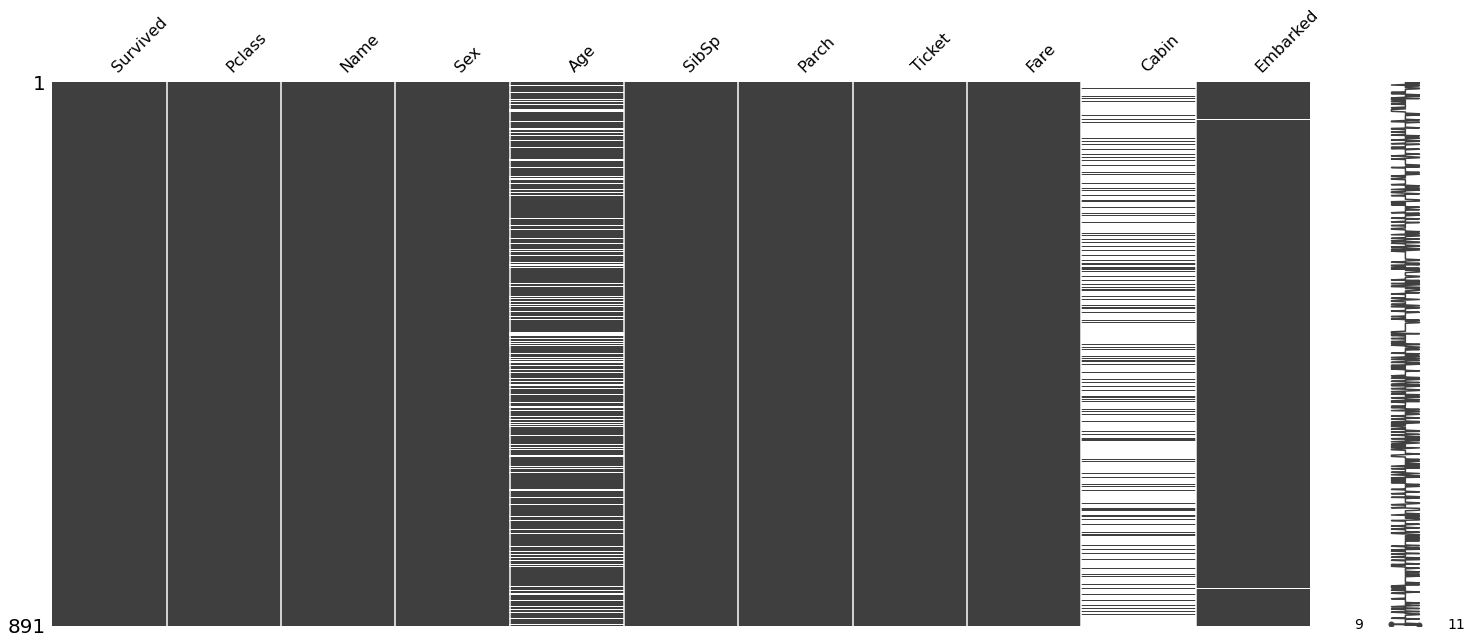

In [10]:
import missingno

print('Training')
missingno.matrix(training)

Testing


<AxesSubplot:>

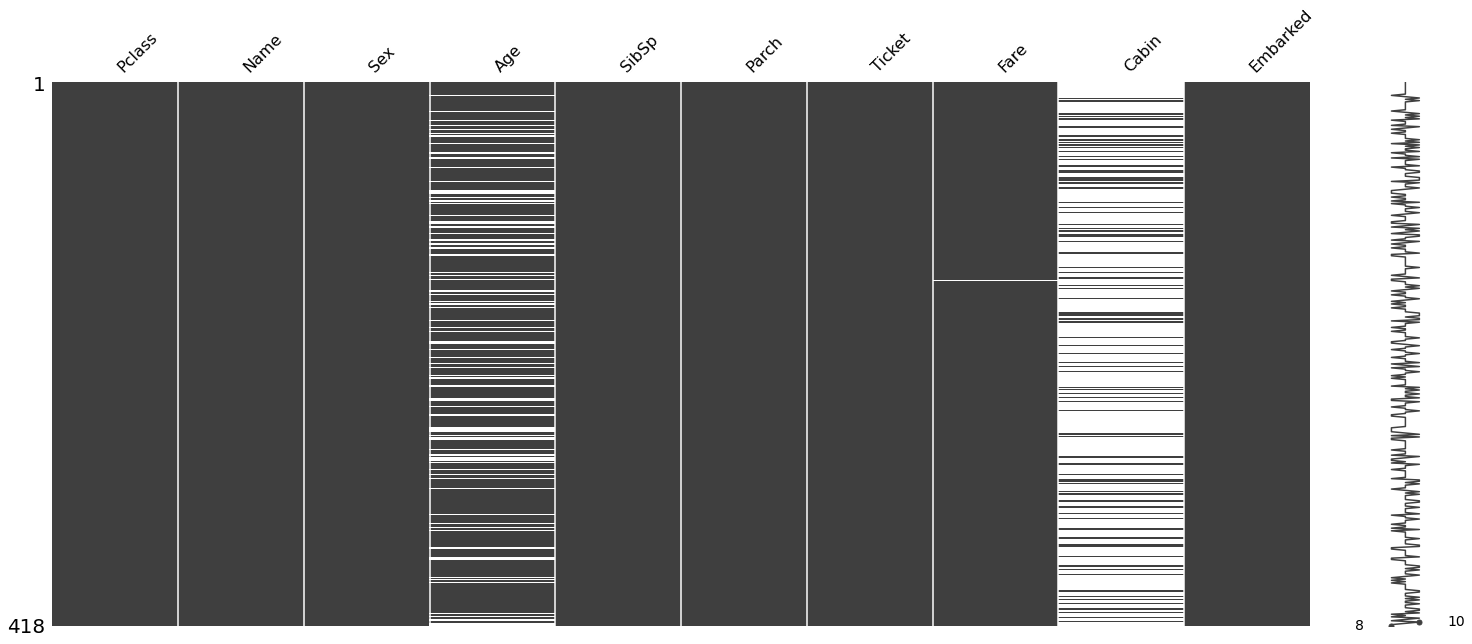

In [11]:
print('Testing')
missingno.matrix(testing)

We will have to figure ou how to fill in these values, or drop them.

Summary Statistics now follow:

In [12]:
# Summary Statistics for training

training.drop('Survived', axis = 1).describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Summary Statistics for testing

testing.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
#Subsetting Survivors from Training

survived_training = training[training['Survived'] == 1]

Passenger Class is currently of type integer. We convert it to categorical type.

In [15]:
training['Pclass'] = training['Pclass'].astype('category')
testing['Pclass'] = testing['Pclass'].astype('category')

print(training.dtypes)
lineOfStars()
print(testing.dtypes)

Survived       int64
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
dtype: object


* * * * * * * * * * * * * * * * * * * * 


Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
dtype: object


# **Feauture Analysis**

Our categorical data our : Sex, Pclass, and Embarked.

**Sex**

In [16]:
#Value Counts in the sex column.

print('Training')

print(training['Sex'].value_counts(normalize = True))

lineOfStars()

print('Testing')

print(testing['Sex'].value_counts(normalize = True))

Training
male      0.647587
female    0.352413
Name: Sex, dtype: float64


* * * * * * * * * * * * * * * * * * * * 


Testing
male      0.636364
female    0.363636
Name: Sex, dtype: float64


We can see that in both sets, males make up roughly 64% of the passengers.

Does Sex give an indication of chance of survival?

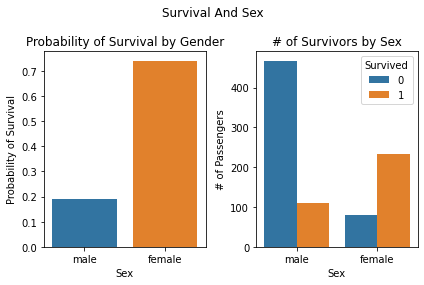

In [17]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'Sex', y = 'Survived', ci=None, ax = ax[0])
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Probability of Survival by Gender')


sns.countplot(data = training, x = 'Sex', hue = 'Survived', ax = ax[1])
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by Sex')

fig.suptitle('Survival And Sex')
plt.tight_layout()
plt.show()

In [18]:
#Probability of survival per Sex
training[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


74% of females survived while only 18% of males survived.

In [19]:
#Probability of being a certain Sex if you survived
survived_training['Sex'].value_counts(normalize = True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

Even though males made up 64% of the passengers, they only made up 31% of the survivors. You were more likely to survive if you were female.

Sex appears to be a good indicator of survival.

**Pclass**

How many people are in each class?

In [20]:
# Value Counts of Passenger Class

print(training['Pclass'].value_counts(normalize = True))

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


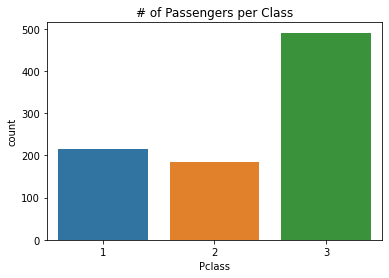

In [21]:
sns.countplot(data = training, x = 'Pclass')
plt.title('# of Passengers per Class')
plt.show()

We see that 3rd class made up 55% of passengers, 24% made up 2nd class, and 20% made up 1st class.

Does class give an indication of survival?

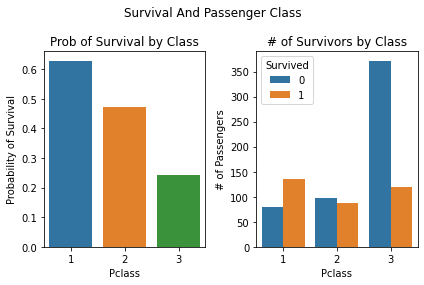

In [22]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'Pclass', y = 'Survived', ci=None, ax = ax[0])
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Prob of Survival by Class')


sns.countplot(data = training, x = 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by Class')

fig.suptitle('Survival And Passenger Class')
plt.tight_layout()
plt.show()

In [23]:
#Probability of survival per Class
training[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


We see that 62% of 1st Class survives, 47% of 2nd Class survived, and 24% of 3rd class survived.

In [24]:
#Probability of being a certain Class if you survived
survived_training['Pclass'].value_counts(normalize = True)

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

Even though 3rd class made up 55% of all passengers, they only made up 34% of all survivors. The majority of survivors were from 1st class.

What if we look at Class and Sex?

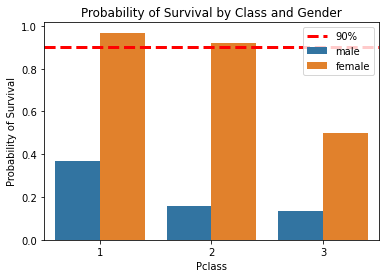

In [25]:
sns.barplot(data = training, x = 'Pclass', y = 'Survived', hue = 'Sex', ci = None)
plt.ylabel('Probability of Survival')
plt.title('Probability of Survival by Class and Gender')
plt.axhline(0.9, c = 'red', linestyle = '--', label = '90%', linewidth = 3.0)
plt.legend()
plt.show()

The above shows that if you were female, if you were from 1st or 2nd class, you had over a 90% chance of survival.

**Embarked**

How many people embarked from each destination? We do not ignore the NONE entries. 

In [26]:
#Value Counts in the sex column.

print('Training')

print(training['Embarked'].value_counts(normalize = True, dropna = False))

lineOfStars()

print('Testing')

print(testing['Embarked'].value_counts(normalize = True))

Training
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: Embarked, dtype: float64


* * * * * * * * * * * * * * * * * * * * 


Testing
S    0.645933
C    0.244019
Q    0.110048
Name: Embarked, dtype: float64


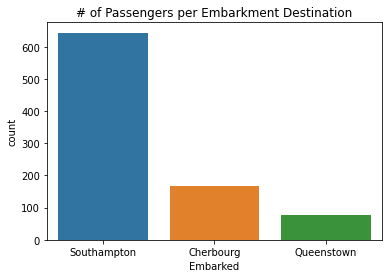

In [27]:
ax = sns.countplot(data = training, x = 'Embarked')
ax.set_title('# of Passengers per Embarkment Destination')
ax.set(xticklabels=["Southampton", "Cherbourg", "Queenstown"])
plt.show()

We see that Southampton was the most common disembarkment destination. 72% of passengers left from here.

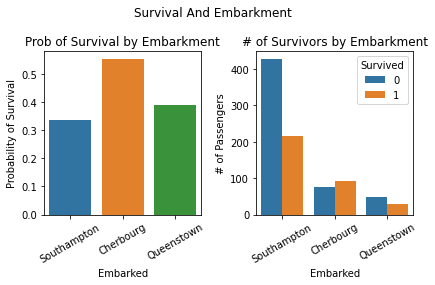

In [28]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'Embarked', y = 'Survived', ci=None, ax = ax[0])
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Prob of Survival by Embarkment')
ax[0].set(xticklabels=["Southampton", "Cherbourg", "Queenstown"])
ax[0].tick_params(axis='x', rotation=30)


sns.countplot(data = training, x = 'Embarked', hue = 'Survived', ax = ax[1])
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by Embarkment')
ax[1].set(xticklabels=["Southampton", "Cherbourg", "Queenstown"])
ax[1].tick_params(axis='x', rotation=30)


fig.suptitle('Survival And Embarkment')
plt.tight_layout()
plt.show()

In [29]:
#Probability of survival per Embarkment
training[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


We see that if you embarked from Cherbourg, you had a 55% chance of survival. Embarking from the remaining to destinations had less tham 39% of survival.

In [30]:
#Probability of having embarked from a certain destination if you survived
survived_training['Embarked'].value_counts(normalize = True)

S    0.638235
C    0.273529
Q    0.088235
Name: Embarked, dtype: float64

Of those that survived, 63% embarked from Southamptom. Cherbourg is overrepresented in survivors. 27% of survivors are from there even though they only make up 19% of the passengers.

Is it the case that most first class passengers boarded from Cherbourg?

In [31]:
#% of class perEmarkment
training.groupby(['Embarked'])['Pclass'].value_counts(normalize = True,sort = False)

Embarked   
C         1    0.505952
          2    0.101190
          3    0.392857
Q         1    0.025974
          2    0.038961
          3    0.935065
S         1    0.197205
          2    0.254658
          3    0.548137
Name: Pclass, dtype: float64

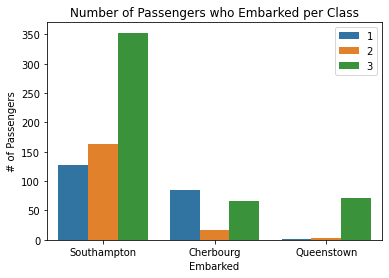

In [32]:
ax = sns.countplot(data = training, x = 'Embarked', hue = 'Pclass')
plt.ylabel('# of Passengers')
plt.title('Number of Passengers who Embarked per Class')
ax.set(xticklabels=["Southampton", "Cherbourg", "Queenstown"])
plt.legend()
plt.show()

The above shows that 1st class was the most frequent type of ticket from Cherbourg. 50% of the tickets from there were 1st class. It was the least common ticket from the other two destinations.

**Ticket**

Let us try to make sense of the ticket feature.

In [33]:
#Are all ticket numbers unique?
print('There are %d ticket numbers.' % len(training['Ticket'].unique()))
len(training['Ticket'].unique()) == len(training)

There are 681 ticket numbers.


False

Each person does not have a unique ticket! Which ticket number occurs more than once?

In [34]:
#Listing all ticket numbers which are shared by 2 or more people
frequentTicket = training.groupby('Ticket')['Ticket'].filter(lambda x : len(x) > 1)
print(frequentTicket)

3          113803
7          349909
8          347742
9          237736
10        PP 9549
          ...    
876          7534
879         11767
880        230433
885        382652
888    W./C. 6607
Name: Ticket, Length: 344, dtype: object


It can be seen that several ticket numbers are shared. Is it the case that these are all members of the same family?

In [35]:
#Printing Details of people who share a ticket.

printedTic = {}

for number in frequentTicket:
    if number not in printedTic:
        printedTic[number] = 1
        print(number)
        print(training[training['Ticket'] == number][['Name','Age','SibSp', 'Parch','Fare','Cabin', 'Embarked']])
        lineOfStars()
    


113803
                                             Name   Age  SibSp  Parch  Fare  \
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0  53.1   
137                   Futrelle, Mr. Jacques Heath  37.0      1      0  53.1   

    Cabin Embarked  
3    C123        S  
137  C123        S  


* * * * * * * * * * * * * * * * * * * * 


349909
                                            Name   Age  SibSp  Parch    Fare  \
7                 Palsson, Master. Gosta Leonard   2.0      3      1  21.075   
24                 Palsson, Miss. Torborg Danira   8.0      3      1  21.075   
374                   Palsson, Miss. Stina Viola   3.0      3      1  21.075   
567  Palsson, Mrs. Nils (Alma Cornelia Berglund)  29.0      0      4  21.075   

    Cabin Embarked  
7     NaN        S  
24    NaN        S  
374   NaN        S  
567   NaN        S  


* * * * * * * * * * * * * * * * * * * * 


347742
                                                  Name   Age  SibSp  Parch  \
8   

Is appears that the majority of shared tickets are a result of the ticket belonging to a single family. For example, Ticket 347082 is held by people with the last name Andersson. The Sibsp and Parch seem to indicate that these are all members of the same family.

However, Ticket 1601 is from people who do not seem to be travelling with familiy members. These could possibly be a group of friends travelling together.

This fact could potentially be incorporated later on.

In [36]:
#Printing the unique ticket numbers
print(training['Ticket'].unique())
len(training['Ticket'].unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

681

How does having a 'shared ticket' impact your chance of survival?

In [37]:
#Chance of surviving if you had a shared ticket

numHadSharedTicket = len(training[(training['Survived'] == 1) & (training['Ticket'].isin(frequentTicket))])
numSurv = len(training[training['Ticket'].isin(frequentTicket)])

'If you had a shared ticket, you had a {}% chance of survival.'.format(np.round(numHadSharedTicket/numSurv*100, 2))

'If you had a shared ticket, you had a 52.03% chance of survival.'

Examining the tickets, there is not enough known to extract more info from the specific numbers.

**Cabins**

In [38]:
#Examining Training Cabins
training['Cabin'].sort_values().unique()

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [39]:
#Examining Testing Cabins
testing['Cabin'].sort_values().unique()

array(['A11', 'A18', 'A21', 'A29', 'A34', 'A9', 'B10', 'B11', 'B24',
       'B26', 'B36', 'B41', 'B45', 'B51 B53 B55', 'B52 B54 B56',
       'B57 B59 B63 B66', 'B58 B60', 'B61', 'B69', 'B71', 'B78', 'C101',
       'C105', 'C106', 'C116', 'C130', 'C132', 'C22 C26', 'C23 C25 C27',
       'C28', 'C31', 'C32', 'C39', 'C46', 'C51', 'C53', 'C54', 'C55 C57',
       'C6', 'C62 C64', 'C7', 'C78', 'C80', 'C85', 'C86', 'C89', 'C97',
       'D', 'D10 D12', 'D15', 'D19', 'D21', 'D22', 'D28', 'D30', 'D34',
       'D37', 'D38', 'D40', 'D43', 'E31', 'E34', 'E39 E41', 'E45', 'E46',
       'E50', 'E52', 'E60', 'F', 'F E46', 'F E57', 'F G63', 'F2', 'F33',
       'F4', 'G6', nan], dtype=object)

All tickets appear to have a prefix of the letters A,B,C,D,E,F,G, and T. 
What is the most common cabin?

In [40]:
#Filling Null Values in the Cabin column with 'N'

training['Cabin'] = training['Cabin'].fillna('N')
testing['Cabin'] = testing['Cabin'].fillna('N')

In [41]:
#Replacing Cabin Values with just the first character of the Cabin number
training['Cabin'] = training['Cabin'].apply(lambda x : x[:1])
testing['Cabin'] = testing['Cabin'].apply(lambda x : x[:1])

In [42]:
#Value Counts in the Cabin column.

print('Training')

print(training['Cabin'].value_counts(normalize = True, dropna = False))

lineOfStars()

print('Testing')

print(testing['Cabin'].value_counts(normalize = True))

Training
N    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: Cabin, dtype: float64


* * * * * * * * * * * * * * * * * * * * 


Testing
N    0.782297
C    0.083732
B    0.043062
D    0.031100
E    0.021531
F    0.019139
A    0.016746
G    0.002392
Name: Cabin, dtype: float64


In [43]:
#Value Counts in the Cabin column.

print('Training')

print(training['Cabin'].value_counts( dropna = False))

lineOfStars()

print('Testing')

print(testing['Cabin'].value_counts())

Training
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


* * * * * * * * * * * * * * * * * * * * 


Testing
N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64


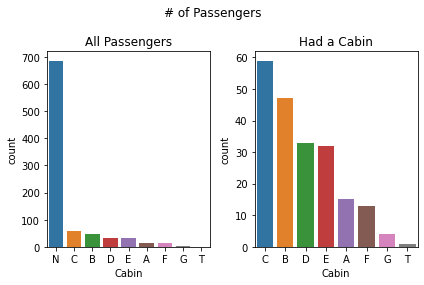

In [44]:
fig, ax = plt.subplots(1,2)

sns.countplot(data = training, x = 'Cabin', ax = ax[0], order = training['Cabin'].value_counts().index)
ax[0].set_title('All Passengers')

sns.countplot(data = training[training['Cabin'] != 'N'], x = 'Cabin', ax = ax[1], order = training[training['Cabin'] != 'N']['Cabin'].value_counts().index)
ax[1].set_title('Had a Cabin')

fig.suptitle('# of Passengers')
plt.tight_layout()

plt.show()

We see that the majority of passengers did not have an assigned Cabin. Of the cabins that were assigned, the most common at 6% had prefix 'C'. The least common was prefix 'T' which was assigned to only one passenger.

Does Cabin prefix give an indication of survival chances?

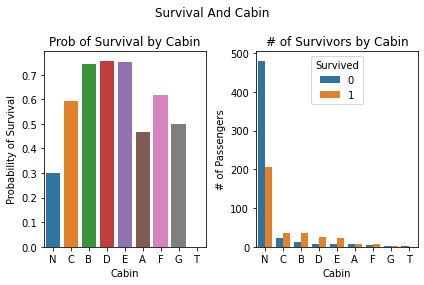

In [45]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'Cabin', y = 'Survived', ci=None, ax = ax[0], order = training['Cabin'].value_counts().index)
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Prob of Survival by Cabin')


sns.countplot(data = training, x = 'Cabin', hue = 'Survived', ax = ax[1], order = training['Cabin'].value_counts().index)
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by Cabin')


fig.suptitle('Survival And Cabin')
plt.tight_layout()
plt.show()

In [46]:
#Probability of survival per Cabin
training[['Cabin','Survived']].groupby(['Cabin']).mean().sort_values(by = 'Survived')

,Survived
Cabin,
T,0.000000
N,0.299854
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


We see that if you were in Cabins D, E, B, F, C, and G you had at least a 50% chance of survival. Passengers in cabins D and E had at least a 75% chance or survival. Those without a cabin had a 30% chance of survival. The single passenger on Cabin T did not survive. 

What is the probability if you had a Cabin that you survived?

In [47]:
#Chance of surviving if you had a cabin

numHadCabAndSurv = len(training[(training['Survived'] == 1) & (training['Cabin'] != 'N')])
numSurv = len(training[training['Cabin'] != 'N'])

numHadCabAndSurv/numSurv

'If you had a cabin, you had a {}% chance of survival.'.format(np.round(numHadCabAndSurv/numSurv*100, 2))

'If you had a cabin, you had a 66.67% chance of survival.'

# Numerical Data

It's time to move onto Numerical data.

Our numeric data features are Fare, Age, Sibsp, and Parch.

**Age**
First let us examine age.

In [48]:
print('median   {}'.format(training['Age'].median()))

print(training['Age'].describe())

median   28.0
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


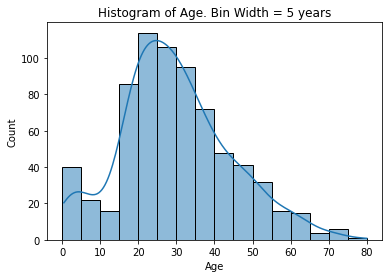

In [49]:
sns.histplot(data = training, x = 'Age', binrange = [0,80], binwidth = 5, kde = True)
plt.title('Histogram of Age. Bin Width = 5 years')
plt.show()

We see the Age feature follows a somewhat normal distribution. The mean age is 29.6yrs, while the median is 28. The oldest passenger was 80yrs old.

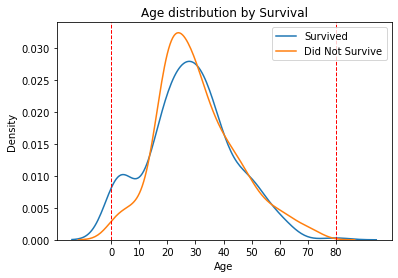

In [50]:
sns.kdeplot(training['Age'][training['Survived']==1], label = 'Survived')
sns.kdeplot(training['Age'][training['Survived']==0], label = 'Did Not Survive')
plt.title('Age distribution by Survival')
plt.xticks(np.arange(0, 81, step=10))
plt.axvline(0, c = 'red', linestyle = '--', linewidth = 1)
plt.axvline(80, c = 'red', linestyle = '--', linewidth = 1)
plt.legend()
plt.show()

The left handside of the above plot seems to indicate that being a child greatly incresed your chance of surviving.

What proportion of children (people 10 or less) survived?

In [51]:
numChildren = len(training[training['Age']<= 10])

'{}% of children survived'.format(np.round(len(training[(training['Survived'] == 1) & (training['Age']<= 10)])/numChildren*100,2))

'59.38% of children survived'

Missing Ages need to be filled in. 

**Fares**

Let's look at fares.

In [52]:
print('median   {}'.format(training['Fare'].median()))

print(training['Fare'].describe())

median   14.4542
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


Notice that the minimum fare is 0. This indicates that some people travelled for free.

In [53]:
#People who travelled for free.
training[training['Fare']==0]['Name']

179                 Leonard, Mr. Lionel
263               Harrison, Mr. William
271        Tornquist, Mr. William Henry
277         Parkes, Mr. Francis "Frank"
302     Johnson, Mr. William Cahoone Jr
413      Cunningham, Mr. Alfred Fleming
466               Campbell, Mr. William
481    Frost, Mr. Anthony Wood "Archie"
597                 Johnson, Mr. Alfred
633       Parr, Mr. William Henry Marsh
674          Watson, Mr. Ennis Hastings
732                Knight, Mr. Robert J
806              Andrews, Mr. Thomas Jr
815                    Fry, Mr. Richard
822     Reuchlin, Jonkheer. John George
Name: Name, dtype: object

Instead of having a shared ticket price per passenger, we should check if any people on the same ticket have paid a different fare.

In [54]:
ticks = {}
ticksCount = {}

for index, row in training.iterrows():
    if row['Ticket'] not in ticks:
        ticks[row['Ticket']] = [row['Fare']]
        ticksCount[row['Ticket']] = 1
    else:
        if row['Fare'] in ticks[row['Ticket']]:
            pass
        else:
            ticks[row['Ticket']].append(row['Fare'])
        ticksCount[row['Ticket']] += 1


for key in ticks:
    if len(ticks[key]) > 1:
        print('Ticket {} had fares {}.'.format(key, ticks[key]))
        print('\n The passengers on this ticket were:')
        
        print(training[training['Ticket'] == key][['Name','Fare']])

Ticket 7534 had fares [9.2167, 9.8458].

 The passengers on this ticket were:
                              Name    Fare
138            Osen, Mr. Olaf Elon  9.2167
876  Gustafsson, Mr. Alfred Ossian  9.8458


As part of feature engineering, maybe we should do fares per passenger rather than per ticket?

In [55]:
pd.DataFrame({'Counts': ticksCount.values()}).value_counts()


Counts
1         547
2          94
3          21
4          11
6           3
7           3
5           2
dtype: int64

**SibSp and Parch**


Let us look at SibSp first.

In [56]:
#Value Counts in the SibSp column.

print('Training')

print(training['SibSp'].value_counts(normalize = True, dropna = False))

lineOfStars()

print('Testing')

print(testing['SibSp'].value_counts(normalize = True))

Training
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


* * * * * * * * * * * * * * * * * * * * 


Testing
0    0.677033
1    0.263158
2    0.033493
3    0.009569
4    0.009569
8    0.004785
5    0.002392
Name: SibSp, dtype: float64


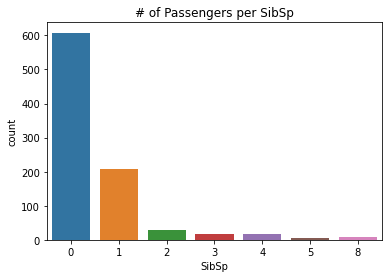

In [57]:
ax = sns.countplot(data = training, x = 'SibSp')
ax.set_title('# of Passengers per SibSp')
plt.show()

We se that the majority of passengers (68%) travelled without a sibling or a spouse.

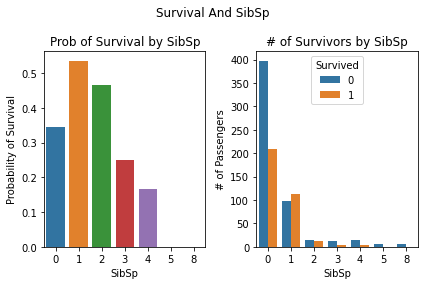

In [58]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'SibSp', y = 'Survived', ci=None, ax = ax[0])
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Prob of Survival by SibSp')


sns.countplot(data = training, x = 'SibSp', hue = 'Survived', ax = ax[1])
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by SibSp')


fig.suptitle('Survival And SibSp')
plt.tight_layout()
plt.show()

The above shows that if you travelled with one sibling or spouse, you had over a 50% chance of survival.

In [59]:
#Value Counts in the parch column.

print('Training')

print(training['Parch'].value_counts(normalize = True, dropna = False))

lineOfStars()

print('Testing')

print(testing['Parch'].value_counts(normalize = True))

Training
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


* * * * * * * * * * * * * * * * * * * * 


Testing
0    0.775120
1    0.124402
2    0.078947
3    0.007177
4    0.004785
9    0.004785
6    0.002392
5    0.002392
Name: Parch, dtype: float64


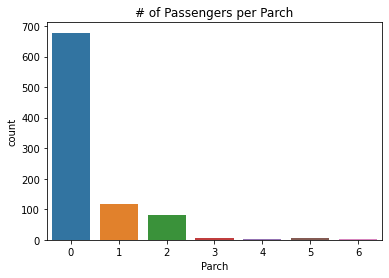

In [60]:
ax = sns.countplot(data = training, x = 'Parch')
ax.set_title('# of Passengers per Parch')
plt.show()

We see that the majority of passengers (76%) travelled without a parent or child.

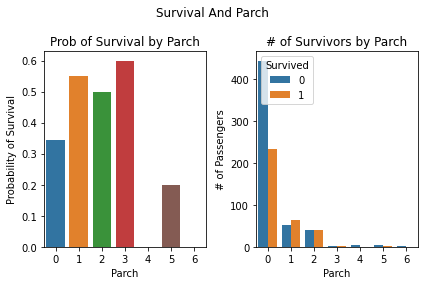

In [61]:
fig, ax = plt.subplots(1,2)

sns.barplot(data = training, x = 'Parch', y = 'Survived', ci=None, ax = ax[0])
ax[0].set_ylabel('Probability of Survival')
ax[0].set_title('Prob of Survival by Parch')


sns.countplot(data = training, x = 'Parch', hue = 'Survived', ax = ax[1])
ax[1].set_ylabel('# of Passengers')
ax[1].set_title('# of Survivors by Parch')


fig.suptitle('Survival And Parch')
plt.tight_layout()
plt.show()

The above shows that if you travelled with 1 or 3 parents or children, you had over 50% of surviving. This backs up our earlier observation that children had a high probability of being saved.

# Data Preprocessing

It is time to clean our data.

In [62]:
#What is na in training
training.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [63]:
#What is na in testing
testing.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Cabin        0
Embarked     0
dtype: int64

Firstly we will change the Name feature. Instead we will extract everyone's title. 

In [64]:
#grabbing titles
training['Title'] = training['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
testing['Title'] = testing['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [65]:
#Counts of titles
print(training['Title'].value_counts())
lineOfStars()
testing['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


* * * * * * * * * * * * * * * * * * * * 




Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

We will combine some titles such as Miss, Mlle, and Ms.

In [66]:
#Group some titles
for df in [training, testing]:
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace(['Major', 'Col', 'the Countess', 'Capt', 'Sir', 'Lady', 
                                       'Don', 'Jonkheer', 'Dona'], 'Other')

training['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      10
Dr          7
Rev         6
Name: Title, dtype: int64

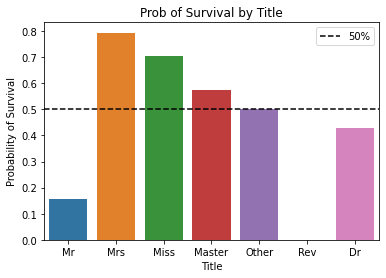

In [67]:
#Survival by title
sns.barplot(data = training, x = 'Title', y = 'Survived', ci=None)
plt.axhline(y = 0.5, linestyle = '--', label = '50%', c = 'black')
plt.ylabel('Probability of Survival')
plt.title('Prob of Survival by Title')
plt.legend()
plt.show()

The above shows that those with the title Mrs, Miss and Master had over a 50% chance of survival. This reflects the observation that women and children had high chance of survival.

In [68]:
#Dropping Name
for df in [training, testing]:
    df.drop('Name', axis = 1, inplace = True)

**Embarked**

For the null Embarked values, we will replace these will the most common entry : Southamptom.

In [69]:
#Getting most common embarking destingation adnnd using it to fill missing values.

modeEmbarked = training['Embarked'].dropna().mode()[0]

for df in [training, testing]:
    df['Embarked'].fillna(modeEmbarked, inplace = True)


**Age**

Let us examine who is missing an age.

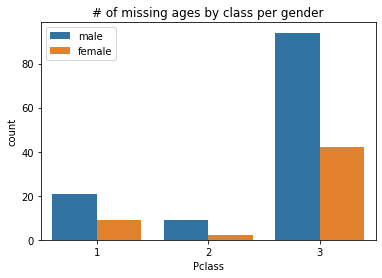

In [70]:
sns.countplot(data = training.loc[training['Age'].isna()], x = 'Pclass', hue = 'Sex')
plt.title('# of missing ages by class per gender')
plt.legend()
plt.show()

In [71]:
#Creating a dictionary of the median by class and gender
medianAges = {}

for sex in ['male','female']:
    for pclass in [1,2,3]:
        medianAges[sex + str(pclass)] = training.loc[(training['Sex'] == sex) & (training['Pclass'] == pclass)]['Age'].dropna().median()

In [72]:
#Using the median ages from the training class to fill in nan values.
for df in [training, testing]:
    for index, row in df.iterrows():
        if pd.isna(row['Age']):
            key = row['Sex'] + str(row['Pclass'])
            df.loc[index, 'Age'] = medianAges[key]

**Sex**

Sex must be converted to integers.

In [73]:
#Setting male to 1 and female to 0
for df in [training, testing]:
    df['Sex'].replace({'male': 1, 'female' : 0}, inplace = True)

**Age**

We will replace individual ages with Age bins. We will use bins of size 10 years. So there will be 8 bins.
0 -> (0, 10], 1 -> (10, 20], ....., 7 -> (70, 80]

In [74]:
#Creating the bin age 
for df in [training, testing]:
    df['Agebin'] = pd.cut(df['Age'], bins = [-1, 0,10,20,30,40,50,60,70,80], right = True, labels = np.arange(-1,8,1))
    df.drop('Age', axis = 1, inplace = True)
    df['Agebin'] = df['Agebin'].astype('int')


In [75]:
training['Agebin'].describe()

count    891.000000
mean       2.373737
std        1.319919
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Agebin, dtype: float64

**Fare**

There are now no na entires in the training set.

Before filling the testing data, we examine group sizes to create a 'Fare per passneger' instead of the current 'Fare' price which is per ticket.

In [76]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    int64   
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Ticket    891 non-null    object  
 6   Fare      891 non-null    float64 
 7   Cabin     891 non-null    object  
 8   Embarked  891 non-null    object  
 9   Title     891 non-null    object  
 10  Agebin    891 non-null    int64   
dtypes: category(1), float64(1), int64(5), object(4)
memory usage: 70.7+ KB


We use TicksCount to create an 'alone' feature. We assume if you are sharing a ticket, you are travelling in a group.

In [77]:
#This was the number of people who shared a ticket number
ticksCount

{'A/5 21171': 1,
 'PC 17599': 1,
 'STON/O2. 3101282': 1,
 '113803': 2,
 '373450': 1,
 '330877': 1,
 '17463': 1,
 '349909': 4,
 '347742': 3,
 '237736': 2,
 'PP 9549': 2,
 '113783': 1,
 'A/5. 2151': 1,
 '347082': 7,
 '350406': 1,
 '248706': 1,
 '382652': 5,
 '244373': 1,
 '345763': 1,
 '2649': 1,
 '239865': 2,
 '248698': 1,
 '330923': 1,
 '113788': 1,
 '347077': 4,
 '2631': 1,
 '19950': 4,
 '330959': 1,
 '349216': 1,
 'PC 17601': 1,
 'PC 17569': 2,
 '335677': 1,
 'C.A. 24579': 1,
 'PC 17604': 2,
 '113789': 2,
 '2677': 1,
 'A./5. 2152': 1,
 '345764': 2,
 '2651': 2,
 '7546': 1,
 '11668': 2,
 '349253': 1,
 'SC/Paris 2123': 3,
 '330958': 1,
 'S.C./A.4. 23567': 1,
 '370371': 1,
 '14311': 1,
 '2662': 1,
 '349237': 2,
 '3101295': 6,
 'A/4. 39886': 1,
 'PC 17572': 3,
 '2926': 1,
 '113509': 1,
 '19947': 1,
 'C.A. 31026': 1,
 '2697': 1,
 'C.A. 34651': 3,
 'CA 2144': 6,
 '2669': 1,
 '113572': 2,
 '36973': 2,
 '347088': 6,
 'PC 17605': 1,
 '2661': 2,
 'C.A. 29395': 1,
 'S.P. 3464': 1,
 '3101281': 1,

In [78]:
training['notAlone'] = -1

for index, row in training.iterrows():
    if ticksCount[str(row['Ticket'])] > 1 or row['SibSp'] > 0 or row['Parch'] > 0:
        training.loc[index, 'notAlone'] = 1
    else:
        training.loc[index, 'notAlone'] = 0

Now examining Test data:

In [79]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    int64   
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   Ticket    418 non-null    object  
 5   Fare      417 non-null    float64 
 6   Cabin     418 non-null    object  
 7   Embarked  418 non-null    object  
 8   Title     418 non-null    object  
 9   Agebin    418 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 30.1+ KB


One Fare is missing. Does anyone share that person's Ticket number?

In [80]:
#What is the ticket number that is missing?
testing.loc[testing['Fare'].isna()]['Ticket']

152    3701
Name: Ticket, dtype: object

In [81]:
#No one in testing does
testing.loc[testing['Ticket'] == '3701']

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agebin
152,3,1,0,0,3701,NaN,N,S,Mr,6


In [82]:
#No one in training does
testing.loc[training['Ticket'] == '3701']

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Agebin


We will fill the value as the median for people in 3rd class, with no Cabin, who departed from S

In [83]:
med = training.loc[(training['Embarked'] == 'S') & (training['Cabin'] == 'N') & (training['Pclass'] == 3)]['Fare'].median()

testing['Fare'].fillna(med, inplace = True)

testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    int64   
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   Ticket    418 non-null    object  
 5   Fare      418 non-null    float64 
 6   Cabin     418 non-null    object  
 7   Embarked  418 non-null    object  
 8   Title     418 non-null    object  
 9   Agebin    418 non-null    int64   
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 30.1+ KB


Now to create the 'notAlone' column for testing.

In [84]:
ticks = {}
ticksCount = {}

for index, row in testing.iterrows():
    if row['Ticket'] not in ticks:
        ticks[row['Ticket']] = [row['Fare']]
        ticksCount[row['Ticket']] = 1
    else:
        if row['Fare'] in ticks[row['Ticket']]:
            pass
        else:
            ticks[row['Ticket']].append(row['Fare'])
        ticksCount[row['Ticket']] += 1


for key in ticks:
    if len(ticks[key]) > 1:
        print('Ticket {} had fares {}.'.format(key, ticks[key]))
        print('\n The passengers on this ticket were:')
        
        print(testing[testing['Ticket'] == key][['Name','Fare']])

In [85]:
#Testing noAlone
testing['notAlone'] = -1

for index, row in testing.iterrows():
    if ticksCount[str(row['Ticket'])] > 1 or row['SibSp'] > 0 or row['Parch'] > 0:
        testing.loc[index, 'notAlone'] = 1
    else:
        testing.loc[index, 'notAlone'] = 0

Dropping Ticket feature.

In [86]:
for df in [training, testing]:
    df.drop('Ticket',inplace = True, axis = 1)

Let us examine the distribution of fares.

Text(0.5, 1.0, 'Fares of Testing')

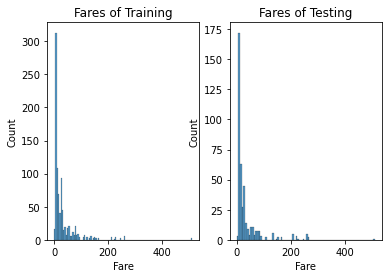

In [87]:
#Plot of fares
fig, ax = plt.subplots(1,2)

sns.histplot(data = training, x = 'Fare', ax = ax[0])
ax[0].set_title('Fares of Training')
sns.histplot(data = testing, x = 'Fare', ax = ax[1])
ax[1].set_title('Fares of Testing')

We will scale the Fares column via a log transformation.

In [88]:
for df in [training, testing]:
    df['Fare'] = [np.log(x) if x > 0 else 0 for x in df['Fare']]
    df.rename(columns = {'Fare': 'log_Fare'}, inplace = True)

Text(0.5, 1.0, 'log_Fares of Testing')

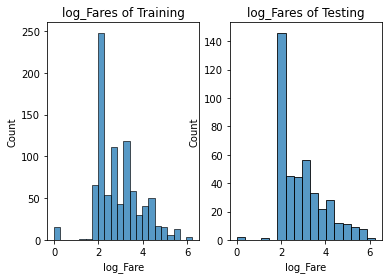

In [89]:
#Plot of scaled fares.
fig, ax = plt.subplots(1,2)

sns.histplot(data = training, x = 'log_Fare', ax = ax[0])
ax[0].set_title('log_Fares of Training')
sns.histplot(data = testing, x = 'log_Fare', ax = ax[1])
ax[1].set_title('log_Fares of Testing')

Converting Sex, Cabin, Embarked, Title, Agebin, and notAlone to category.

In [90]:
for feature in ['Sex', 'Cabin', 'Embarked', 'Title', 'Agebin', 'notAlone']:
    for df in [training, testing]:
        df[feature] = df[feature].astype('category')
        
training['Survived'] = training['Survived'].astype('category')

In [91]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   SibSp     418 non-null    int64   
 3   Parch     418 non-null    int64   
 4   log_Fare  418 non-null    float64 
 5   Cabin     418 non-null    category
 6   Embarked  418 non-null    category
 7   Title     418 non-null    category
 8   Agebin    418 non-null    category
 9   notAlone  418 non-null    category
dtypes: category(7), float64(1), int64(2)
memory usage: 14.3 KB


Splitting Data.

In [92]:
#Splitting data into features and target
X_train = training.iloc[:, 1:]
y_train = training.iloc[:, 0]
X_test = testing

In [93]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.columns

Index(['SibSp', 'Parch', 'log_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_0', 'Sex_1', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev', 'Agebin_0', 'Agebin_1',
       'Agebin_2', 'Agebin_3', 'Agebin_4', 'Agebin_5', 'Agebin_6', 'Agebin_7',
       'notAlone_0', 'notAlone_1'],
      dtype='object')

In [94]:
#Any features in X_train that are not in X_test?
A = set(X_train.columns)
B = set(X_test.columns)

A.difference(B)

{'Cabin_T'}

'Cabin T' is not in testing. This cabin was only assigned to one cabin. 

In [95]:
X_train.drop('Cabin_T', inplace = True, axis = 1)

Need to drop some columns.


In [96]:
X_train.columns

Index(['SibSp', 'Parch', 'log_Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_0', 'Sex_1', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Title_Rev', 'Agebin_0', 'Agebin_1',
       'Agebin_2', 'Agebin_3', 'Agebin_4', 'Agebin_5', 'Agebin_6', 'Agebin_7',
       'notAlone_0', 'notAlone_1'],
      dtype='object')

In [97]:
#We drop some columns
for df in [X_train, X_test]:
    for feature in ['Pclass_2','Sex_0', 'Embarked_Q', 'Title_Rev', 'Agebin_7','notAlone_0']:
        df.drop(feature, axis = 1, inplace = True)
        
X_train.columns

Index(['SibSp', 'Parch', 'log_Fare', 'Pclass_1', 'Pclass_3', 'Sex_1',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_N', 'Embarked_C', 'Embarked_S', 'Title_Dr',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Agebin_0', 'Agebin_1', 'Agebin_2', 'Agebin_3', 'Agebin_4', 'Agebin_5',
       'Agebin_6', 'notAlone_1'],
      dtype='object')

# Modelling

We can see that there is strong correlation between some features below. For example, notAlone and SibSp. 
We will use PCA to remove features.

We will create a pipeline that will scale the data and then perform PCA analysis.

In [98]:
training.corr()

,SibSp,Parch,log_Fare
SibSp,1.000000,0.414838,0.323214
Parch,0.414838,1.000000,0.336857
log_Fare,0.323214,0.336857,1.000000


Now we will create several pipelines to test the score.

We tried PCA in a different version, it did not lead to improvements.

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

scaler = StandardScaler()
#pca = PCA()

models = []
score = []

We use grid searches to find the best parameters of several different types of models.

In [100]:
#Logreg
from sklearn.linear_model import LogisticRegression

logreg_pipe_pca = Pipeline([("scaler", scaler), #('pca', pca), 
                        ("logreg", LogisticRegression())])

params_lr = {'logreg__max_iter' : [2000],
             'logreg__C' :np.logspace(-4,4,20), 
             #'pca__n_components' : [10,15,20,30],
            'logreg__penalty' : ['l1','l2'],
            'logreg__solver' : ['liblinear']}

logit_search = GridSearchCV(logreg_pipe_pca, params_lr, verbose  = True)

logit_search.fit(X_train, y_train)

print(logit_search.best_params_)

models.append('Logistic Regression')
score.append(logit_search.best_score_)

#print()

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'logreg__C': 0.23357214690901212, 'logreg__max_iter': 2000, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}


In [101]:
#KNeighbors

from sklearn.neighbors import KNeighborsClassifier

knn_pipe_pca = Pipeline([("scaler", scaler),#('pca', pca), 
                        ("knn", KNeighborsClassifier())])

params_knn = {'knn__n_neighbors' : [5,7,9,11],
             'knn__algorithm' : ['auto', 'ball_tree', 'kd_tree'],
            # 'pca__n_components' : [10,15,20,30],
            'knn__weights' : ['uniform', 'distance']}

knn_search = GridSearchCV(knn_pipe_pca, params_knn, verbose  = True)

knn_search.fit(X_train, y_train)

print(knn_search.best_params_)

models.append('KNN')
score.append(knn_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}


In [102]:
#SVC

from sklearn.svm import SVC

svc_pipe_pca = Pipeline([("scaler", scaler),##('pca', pca), 
                        ("svc", SVC(probability=True))])

params_svc = [{'svc__kernel' : ['rbf'], 'svc__gamma' : [.1,.5,1,2,5,10], 'svc__C' : [.1,1,10,100]},
             {'svc__kernel' : ['linear'], 'svc__C' : [.1,1,10,100]},
             {'svc__kernel' : ['poly'], 'svc__degree' : [2,3,4], 'svc__C' : [.1,1,10,100]}]

svc_search = RandomizedSearchCV(svc_pipe_pca, params_svc, verbose  = True, n_jobs = -1, cv = 4, n_iter = 20)

svc_search.fit(X_train, y_train)

models.append('SVC')
score.append(svc_search.best_score_)

print(svc_search.best_params_)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
{'svc__kernel': 'poly', 'svc__degree': 2, 'svc__C': 1}


In [103]:
#Random Forrest

from sklearn.ensemble import  RandomForestClassifier

rf_pipe_pca = Pipeline([("scaler", scaler),#('pca', pca), 
                        ("rf", RandomForestClassifier())])

params_rf = {'rf__max_depth' : [3,5,10,20,50,None],
             'rf__min_samples_split' : [2,5,10],
            'rf__min_samples_leaf' : [1,2,4,10],
             'rf__n_estimators' : [50,100,500],
            'rf__bootstrap' : [True, False]
            }

rf_search = RandomizedSearchCV(rf_pipe_pca, params_rf, verbose  = True, n_jobs = -1, n_iter = 100)

rf_search.fit(X_train, y_train)

print(rf_search.best_params_)

models.append('RF')
score.append(rf_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'rf__n_estimators': 50, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_depth': 10, 'rf__bootstrap': True}


In [104]:
from sklearn.naive_bayes import GaussianNB 

gnb_pipe_pca = Pipeline([("scaler", scaler),#('pca', pca), 
                        ("svc", GaussianNB())])

gnb_score_pca = np.round(np.mean(cross_val_score(gnb_pipe_pca, X_train, y_train)),2)

models.append('Naive Bayes')
score.append(gnb_score_pca)

We see how well our modelds did.

In [105]:
modelScores = pd.DataFrame({'Model': models, 'Score': score})

modelScores.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,RF,0.835001
1,Logistic Regression,0.822673
2,SVC,0.821602
3,KNN,0.818222
4,Naive Bayes,0.750000


In [106]:
X_train.shape

(891, 30)

In [107]:
#Getting the Best Four

best_svc = svc_search.best_estimator_
best_logit = logit_search.best_estimator_
best_knn = knn_search.best_estimator_
best_rf = rf_search.best_estimator_

We will use two voting classifiers with our fourr best individual models. 

In [108]:
#Voting Classifiers
from sklearn.ensemble import VotingClassifier

voting_best_soft = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc), ('rf', best_rf), ('logit', best_logit)], voting = 'soft')

voting_best_hard = VotingClassifier(estimators = [('knn', best_knn), ('svc', best_svc), ('rf', best_rf), ('logit', best_logit)], voting = 'hard')

We train our two voting classifiers below. The hard voter scored the best.

In [109]:
#voting pipelines

pipe_soft = Pipeline([("scaler", scaler), #('pca', pca), 
                        ("vote soft", voting_best_soft)])
                      
pipe_hard = Pipeline([("scaler", scaler), #('pca', pca), 
                        ("vote hard", voting_best_hard)])
                      
print('voting_soft_score', np.round(np.mean(cross_val_score(pipe_soft, X_train, y_train, cv = 5)),4))
                      
print('voting_hard_score', np.round(np.mean(cross_val_score(pipe_hard, X_train, y_train, cv = 5)),4))

voting_soft_score 0.8272
voting_hard_score 0.8294


Creating an ensemble voter.

In [110]:
#Scaling training data
X_train_scaled = scaler.fit_transform(X_train)


#Soft Voter
voting_best_soft.fit(X_train_scaled, y_train)
soft_preds = voting_best_soft.predict(scaler.transform(X_test))

#Hard Voter
voting_best_hard.fit(X_train_scaled, y_train)
hard_preds = voting_best_hard.predict(scaler.transform(X_test))


In [111]:

#Creating Data Frames
testing = pd.read_csv('/kaggle/input/titanic/test.csv')

submit_hard = pd.DataFrame({'PassengerId': testing['PassengerId'], 'Survived': hard_preds})
submit_soft = pd.DataFrame({'PassengerId': testing['PassengerId'], 'Survived': soft_preds})

In [112]:
#Generating CSVs

submit_soft.to_csv('to_submit_soft.csv',index = False)
submit_hard.to_csv('to_submit_hard.csv',index = False)

With the following parameters we scored as followed:

LOGREG
{'logreg__C': 0.23357214690901212, 'logreg__max_iter': 2000, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}

SVC
{'svc__kernel': 'poly', 'svc__degree': 2, 'svc__C': 1}

KNN
{'knn__algorithm': 'kd_tree', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

RF
{'rf__n_estimators': 50, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_depth': 10, 'rf__bootstrap': True}



Soft Voting scored **0.7799**

Hard Voting scored **0.78229** : As of January 2023, this is in the top 18% of submissions.